In [124]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

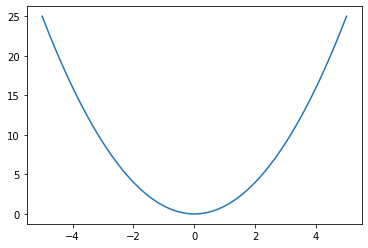

In [137]:
x = np.linspace(-5,5,10000)
y = x**2

sns.lineplot(x,y)


* A form of noise could be gaussian noise wherein we sample from the Normal distribution and add that noise to our manifold or original function to corrupt the data.
* One advantage of using the Normal Distribution is that due to the CLT sample means from any distriution tend to be normally distributed around the true mean as n goes to infinity. So Gaussian Noise should justify many independent sources contributing to the noise since their distribution will be Normal for large N.

In [156]:
def addNoise(y,sigma):
    noise = np.random.normal(loc = 0.0, scale = sigma, size = len(y))
    y =  y+noise
    return y

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

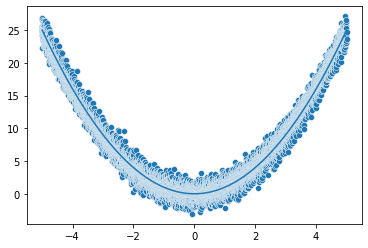

In [162]:
y = x**2
y_p = addNoise(y,1)
fig,ax = plt.subplots()
sns.lineplot(x,y)
sns.scatterplot(x,y_p,ax = ax)

## 3.3

In [38]:
import autoencoder as ae
import importlib

In [68]:
importlib.reload(ae)

<module 'autoencoder' from '/Users/venugopalbhatia/Documents/Deep Learning Theory and Applications/Bhatia_V_Assignment3/autoencoder.py'>

In [69]:
losses,outputs = ae.train()

loss: 0.8253393769264221	 at epoch: 0
loss: 0.7438539266586304	 at epoch: 10
loss: 0.7108284831047058	 at epoch: 20
loss: 0.6979649662971497	 at epoch: 30
loss: 0.6761298179626465	 at epoch: 40
loss: 0.7322255969047546	 at epoch: 50
loss: 0.6781517863273621	 at epoch: 60
loss: 0.7056249380111694	 at epoch: 70
loss: 0.6680634617805481	 at epoch: 80
loss: 0.7045016884803772	 at epoch: 90


In [19]:
outputs[0]

(20,
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([[0.5322, 0.4677, 0.5294,  ..., 0.5390, 0.5043, 0.4621],
         [0.5321, 0.4676, 0.5296,  ..., 0.5390, 0.5039, 0.4620],
         [0.5321, 0.4674, 0.5296,  ..., 0.5391, 0.5042, 0.4621],
         ...,
         [0.5319, 0.4665, 0.5301,  ..., 0.5393, 0.5042, 0.4622],
         [0.5322, 0.4683, 0.5293,  ..., 0.5388, 0.5038, 0.4618],
         [0.5319, 0.4663, 0.5302,  ..., 0.5394, 0.5042, 0.4622]],
        grad_fn=<SigmoidBackward0>))

In [84]:
image = outputs[-1][1]
labels = outputs[-1][3]
reconstructed_image = outputs[-1][2]
image_ = image.reshape(-1, 28, 28)
reconstructed_image_ = reconstructed_image.detach().reshape(-1, 28, 28)

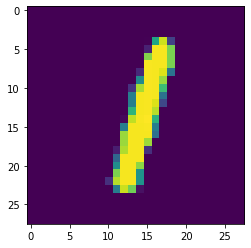

In [90]:
plt.imshow(image_[32])


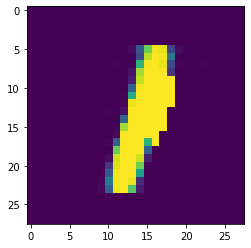

In [91]:
plt.imshow(reconstructed_image_[32])


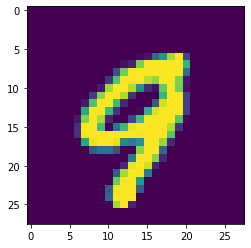

In [101]:
plt.imshow(image_[9])

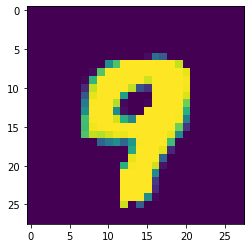

In [102]:
plt.imshow(reconstructed_image_[9])

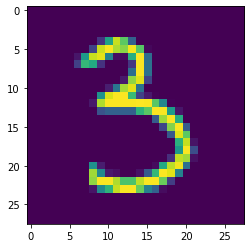

In [103]:
plt.imshow(image_[0])

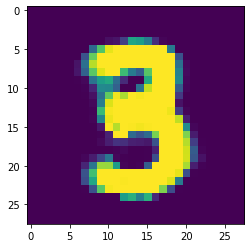

In [104]:
plt.imshow(reconstructed_image_[0])

In [112]:
labels = labels.tolist()

In [108]:
latentEmbeddings = ae.getLatentEmbeddings(image).tolist()

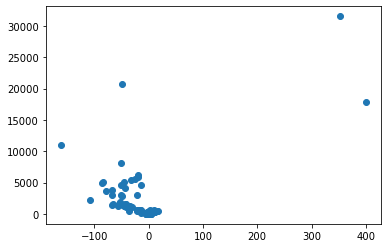

In [116]:
plt.scatter([pt[0] for pt in latentEmbeddings],[pt[1] for pt in latentEmbeddings],label = labels)

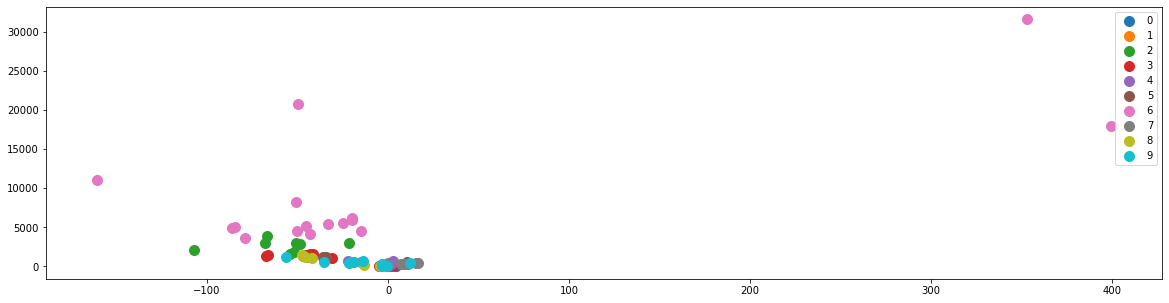

In [123]:
import numpy as np
import seaborn as sns

scatter_x = np.array([pt[0] for pt in latentEmbeddings])
scatter_y = np.array([pt[1] for pt in latentEmbeddings])
group = np.array(labels)


fig, ax = plt.subplots(figsize = (20,5))
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], label = g, s = 100)
ax.legend()
plt.show()

For these set of images based on the latent embeddings of the autoencoder, it is having trouble discerning between 7,4,9 as well as 3,8. This could be specific to just these set of 128 images though.

## 5

#### 5.3

* I tried using different learning rates, 0.0008 for the generator and 0.0002 for the discriminator. This resulted in the images named GAN_Generations_DifferentLRs. Basically the GAN is quite sensitive to the lr and it basically did not from the dataset. 
* In theory training the generator multiple times should result in better performance by the generator and worse performance by the discriminator.
* For hyperparameter tuning, after tinkering with it for a while ultimately I got better results by a) Normalizing the images with mean and standard deviation of 0.5, and a larger batch size. These images are labelled as GAN_Generations_HyperparameterTuning

#### 5.5

* I ran the conditional GAN and it labelled the images pretty well though I feel these images are slightly less blurred than the regular GAN. For instance ankle boots are more defined with the CGAN than they are with the GAN. The regular GAN seems to have a lot more images of the same category such as t-shirts.

#### 5.6

Vaes rely on the latent space to generate new samples, which is a limitation when compared to GANs. GANs on the other hand can sample from a random variable with a probability distribution, generate an image and compete to fool the  discriminator into predicting it as a real image. Thus a lot more vivid images that are indistinguishable from real images may be generated and the generator as well as the discriminator are trained in the process, with the discriminator summing or averaging the loss between a set of real images and a set of fake ones.With Vaes for new sample generation there is interpolation between the latent space representations of real images which generates the new image.

Overall GANs may do a better job of generating more realistic images but a VAE is a lot faster and simpler to train.

#### 5.7

As per the CLT for a large number of observations their average behaves as approximately normal regardless of the distribution these came from, thus Gaussian Noise seems like a valid choice.

The issue with this however is that variable from distributions such as the cauchy which dont have a defined mean or variance dont behave normally and the CLT doesnt hold so in those cases Gaussian noise may not be a good choice.

#### 5.8

The CycleGAN is based on the concept that if there is translation from one domain to the next, followed by the original domain, the result should be just the same as the input. Thus in case of images if we transform them to another domain and then back to the original domain, the same image should be reproduced. For DiscoGANs something very similar happens, there are two GANs each of which create a mapping to their counterpart's domain